# Sampling the Imaginary

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import pymc3 as pm

import matplotlib.pyplot as plt
import seaborn as sns

## Easy

In [2]:
p_grid = np.linspace(0, 1, 1000)
prior = np.repeat(1, 1000)
likelihood = stats.binom.pmf(6, 9, p_grid)
posterior = likelihood * prior
posterior = posterior / posterior.sum()
np.random.seed(100)
samples = np.random.choice(p_grid, size=1000, replace=True, p=posterior)

##### 3E1

How much posterior probability lies below p = 0.2?

In [3]:
sum(samples < 0.2) / 1000

0.002

##### 3E2

How much posterior probability lies below p = 0.8?

In [4]:
sum(samples > 0.8) / 1000

0.122

##### 3E3

How much posterior probability lies between p = 0.2 and p= 0.8?

In [5]:
sum((samples > 0.2) & (samples < 0.8)) / 1000

0.876

##### 3E4

20% of posterior probability lies below which probability?

In [6]:
np.percentile(samples, 20)

0.5165165165165165

##### 3E5

20% of posterior probability lies above which probability?

In [7]:
np.percentile(samples, 80)

0.7587587587587588

##### 3E6

Which values of p contain the narrowest interval equal to 66% of the posterior probability?

In [8]:
pm.stats.hpd(samples, 0.66)

array([0.50550551, 0.77377377])

##### 3E7

Which values of p contain 66% of the posterior probability, assuming equal posterior probability below and above the interval?

In [9]:
np.percentile(samples, [50-66/2, 50+66/2])

array([0.5005005 , 0.77177177])

## Medium

##### 3M1

Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as before.

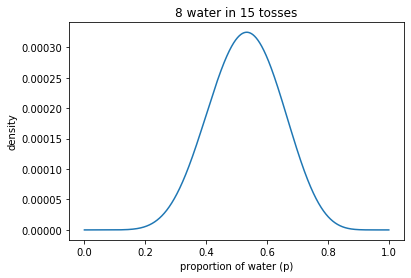

In [10]:
n = 15
k = 8
p_grid = np.linspace(0, 1, 10000)
prior = np.repeat(1, 10000)
likelihood = stats.binom.pmf(k, n, p_grid)
posterior = likelihood * prior
posterior = posterior / posterior.sum()

plt.plot(p_grid, posterior)
plt.title('{} water in {} tosses'.format(k, n))
plt.xlabel('proportion of water (p)')
plt.ylabel('density');

##### 3M2

Draw 10,000 samples from the grid approximation from above. Then use the samples to calculate the 90% HPDI for p.

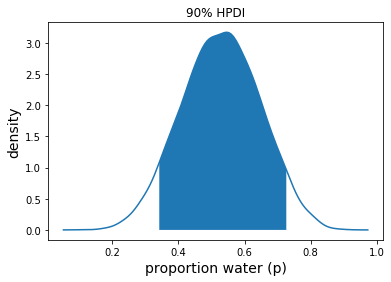

In [11]:
# Get samples from p_grid using posterior probability as weights
samples = np.random.choice(p_grid, size=10000, replace=True, p=posterior)

# Calculate Highest Posterior Density Interval
hpdi = pm.stats.hpd(samples, 0.9)

# Plot HPDI
ax = plt.gca()
sns.kdeplot(samples, ax=ax)
ax.set_xlabel('proportion water (p)', fontsize=14)
ax.set_ylabel('density', fontsize=14)
x1 = ax.lines[0].get_xdata()
y1 = ax.lines[0].get_ydata()
ax.fill_between(x1, y1, where = (x1 > hpdi[0]) & (x1 < hpdi[1]))
ax.set_title('90% HPDI');

##### 3M3

Construct the posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in p. What is the probability of observing 8 water in 15 tosses?

In [12]:
# Get simulation of tosses from sample of water fractions
samples = np.random.choice(p_grid, size=10000, replace=True, p=posterior)
simulation = stats.binom.rvs(size=int(1e4), n=15, p=samples)

# Probability of 8 water in 15 tosses
sum(simulation == 8) / 1e4

0.1487

##### 3M4

Using the posterior distribution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.

In [13]:
# Get simulation of tosses from sample of water fractions
simulation = stats.binom.rvs(size=int(1e4), n=9, p=samples)

# Probability of 6 water in 9 tosses
sum(simulation == 6) / 1e4

0.1833

##### 3M5

Start over at 3M1, but now use a prior that is zero below p = 0.5 and a constant above p = 0.5. This correspnds to prior information that a majority of the earth's surface is water. Repeat each problem above and compare inferences. What difference does the prior make? If it helps, compare inference (using both priors) to the true value p = 0.7

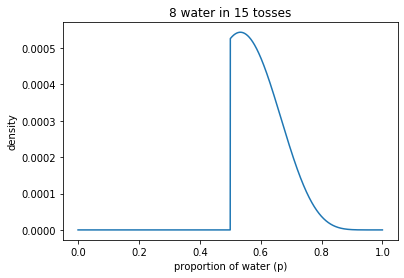

In [14]:
# 3M1
n = 15
k = 8
p_grid = np.linspace(0, 1, 10000)
prior2 = np.where(p_grid < 0.5, 0, 1)
likelihood2 = stats.binom.pmf(k, n, p_grid)
posterior2 = likelihood2 * prior2
posterior2 = posterior2 / posterior2.sum()

plt.plot(p_grid, posterior2)
plt.title('{} water in {} tosses'.format(k, n))
plt.xlabel('proportion of water (p)')
plt.ylabel('density');

Given that we know the earth to be majority water, we see that the posterior distribution has no mass for fractions below 0.5. This is different compared to the original posterior (3M1) where that was a substantial amount of mass below 0.5

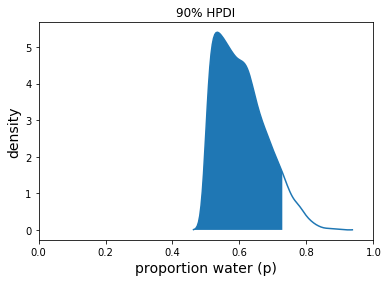

In [15]:
# 3M2
# Get samples from p_grid using posterior probability as weights
samples2 = np.random.choice(p_grid, size=10000, replace=True, p=posterior2)

# Calculate Highest Posterior Density Interval
hpdi2 = pm.stats.hpd(samples2, 0.9)

# Plot HPDI
ax = plt.gca()
sns.kdeplot(samples2, ax=ax)
ax.set_xlabel('proportion water (p)', fontsize=14)
ax.set_ylabel('density', fontsize=14)
ax.set_xlim([0,1])
x1 = ax.lines[0].get_xdata()
y1 = ax.lines[0].get_ydata()
ax.fill_between(x1, y1, where = (x1 > hpdi[0]) & (x1 < hpdi[1]))
ax.set_title('90% HPDI');

The HPDI seems to cover the entire lower portion of the sampled posterior distribution. The original, untruncated prior, had part of the 90% HPDI covering fractions below 0.5.

In [16]:
# 3M3

# Get simulation of tosses from sample of water fractions
samples2 = np.random.choice(p_grid, size=10000, replace=True, p=posterior2)
simulation2 = stats.binom.rvs(size=int(1e4), n=15, p=samples2)

# Probability of 8 water in 15 tosses
sum(simulation2 == 8) / 1e4

0.1567

In [17]:
# Simulation with true values with 15 tosses
true_sim = stats.binom.rvs(size=int(1e4), n=15, p=0.7)

# Probability of 8 water in 15 tosse
sum(true_sim == 8) / 1e4

0.0776

There is a slightly higher probability of obtaining 8 waters with 15 tosses with the new prior (about 15.95% probability) as compared to the original prior (about 14.26%). However, both are a lot higher when compared to simulations from the true probability (probability of about 8.39%). This shows that observing 8 waters of 15 tosses can possibly skew our simulations from the posterior predictive distribution of water fractions away from the simulations from the true fraction.

In [18]:
# 3M4

# Get simulation of tosses from sample of water fractions
simulation2 = stats.binom.rvs(size=int(1e4), n=9, p=samples2)

# Probability of 6 water in 9 tosse
sum(simulation2 == 6) / 1e4

0.2295

In [19]:
# Simulation with true values with 9 tosses
true_sim = stats.binom.rvs(size=int(1e4), n=9, p=0.7)

# Probability of 6 water in 9 tosse
sum(true_sim == 6) / 1e4

0.2676

Probability of observing 6 waters in 9 tosses with:  
1. Original Prior = 17.53%
1. Truncated Prior = 23.77
1. True Value = 26.65%

Therefore, truncating the prior leads us to being closer to the true fraction as we have more information incorporated in the calculation of the posterior predictive distribution.

## Hard

In [20]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0])

##### 3H1

Using grid approximation, compute the posterior distribution for the probability of a birth being a boy. Assume a uniform prior probability. Which parameter value maximizes the posterior probability?

In [21]:
size = 10000
n = len(birth1) + len(birth2)
k = birth1.sum() + birth2.sum()
p_grid = np.linspace(0, 1, size)
prior = np.repeat(1, size)
likelihood = stats.binom.pmf(n=n, k=k, p=p_grid)
posterior = likelihood * prior
posterior = posterior / posterior.sum()

# Parameter that maximizes posterior probability
p_grid[posterior.argmax()]

0.5549554955495549

##### 3H2

Using the sample function, draw 10,000 random parameter values from the posterior distribution you calculated above. Use these samples to estimate the 50%, 89% and 97% highest posterior density intervals.

50% HPDI: 0.53 - 0.58
89% HPDI: 0.50 - 0.61
97% HPDI: 0.48 - 0.62


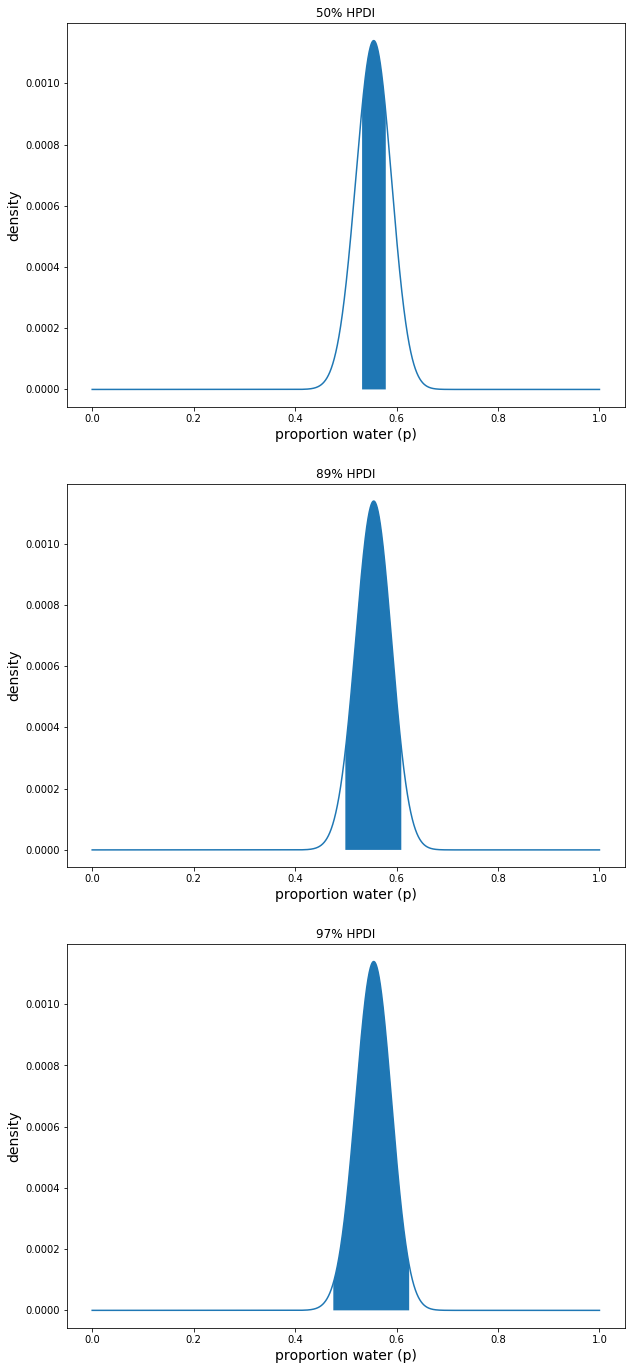

In [22]:
samples = np.random.choice(p_grid, size=size, replace=True, p=posterior)

plt.figure(figsize=(10,24)) 

for idx, i in enumerate([50, 89, 97]):
    hpdi = pm.stats.hpd(samples, i/100)
    print('{}% HPDI: {:.2f} - {:.2f}'.format(i, hpdi[0], hpdi[1]))
    
    # HPDI Plot
    plt.subplot(3, 1, idx+1)
    plt.plot(p_grid, posterior)
    plt.xlabel('proportion water (p)', fontsize=14)
    plt.ylabel('density', fontsize=14)
    plt.fill_between(p_grid, posterior, where = (p_grid > hpdi[0]) & (p_grid < hpdi[1]))
    plt.title('{}% HPDI'.format(i))

##### 3H3

Use `rbinom` to simulate 10,000 replicates of 200 births. You should end up with 10,000 numbers, each one a count of boys out of 200 births. Compare the distribution of of predicted number of boys to the actual count in the data (111 boys out of 200 births). There are many good ways to visualize simulations, but the dens command (part of the `rethinking` package) is probably the easiest way in this case. Does it look like the model fits the data well? That is, does the distribution of predictions include the actual observation as a central, likely outcome?

In [23]:
size=10000

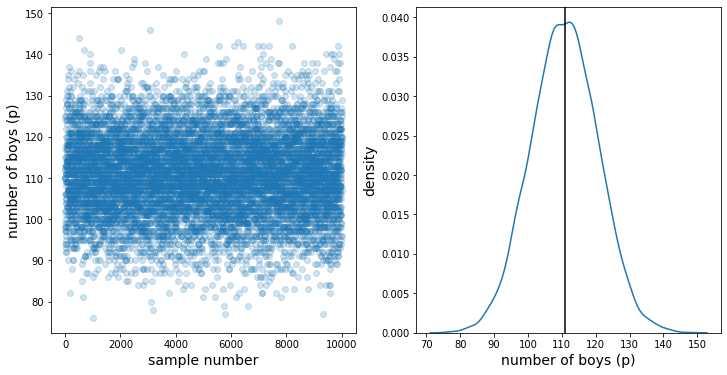

In [24]:
# Assuming sampled priors from posterior distribution
sim = stats.binom.rvs(size=size, n=200, p=samples)

_, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(sim, 'o', alpha=0.2)
ax0.set_xlabel('sample number', fontsize=14)
ax0.set_ylabel('number of boys (p)', fontsize=14)
sns.kdeplot(sim, ax=ax1)
ax1.axvline(birth1.sum() + birth2.sum(), color='black')
ax1.set_xlabel('number of boys (p)', fontsize=14)
ax1.set_ylabel('density', fontsize=14);

##### 3H4

Now compare 10,000 counts of boys from 100 simulated first borns only to the number of boys in the first `birth1`. How does the model look in this light?

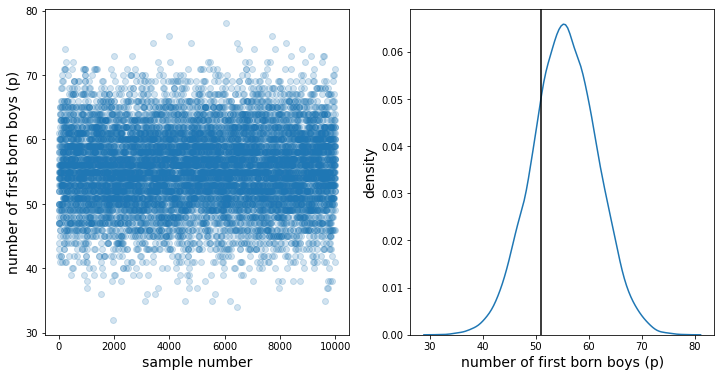

In [25]:
# Assuming sampled priors from posterior distribution of 200 births
sim = stats.binom.rvs(size=size, n=100, p=samples)

_, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(sim, 'o', alpha=0.2)
ax0.set_xlabel('sample number', fontsize=14)
ax0.set_ylabel('number of first born boys (p)', fontsize=14)
sns.kdeplot(sim, ax=ax1)
ax1.axvline(birth1.sum(), color='black')
ax1.set_xlabel('number of first born boys (p)', fontsize=14)
ax1.set_ylabel('density', fontsize=14);

##### 3H5

The model assumes that the sex of the first and second births are independent. To check this assumption, focus now on second births that followed female first borns. Compare 10,000 simulated counts of boys to only those second births that followed girls. To do this correctly, you need to count the number of first borns who were girls and simulate that many births, 10,000 times. Compare the counts of boys in your simulations to the actual observed count of boys following girls. How does the model look in this light? Any guesses what is going on in these data?

In [26]:
n_first_girls = len(birth1) - sum(birth1)
true_boys_after_girls = sum(birth2[birth1 == 0])

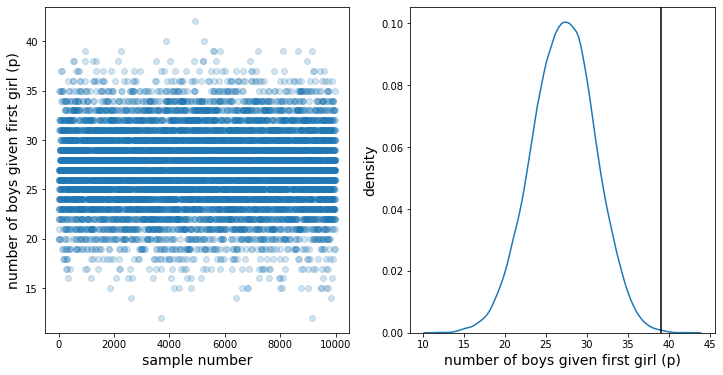

In [27]:
# Assuming sampled priors from posterior distribution of 200 births
sim = stats.binom.rvs(size=size, n=n_first_girls, p=samples)

_, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(sim, 'o', alpha=0.2)
ax0.set_xlabel('sample number', fontsize=14)
ax0.set_ylabel('number of boys given first girl (p)', fontsize=14)
sns.kdeplot(sim, ax=ax1)
ax1.axvline(true_boys_after_girls, color='black')
ax1.set_xlabel('number of boys given first girl (p)', fontsize=14)
ax1.set_ylabel('density', fontsize=14);

In [28]:
import sys, IPython, scipy, matplotlib, platform, statsmodels, arviz
print("""
This notebook was created using:\nPython {}\nIPython {}\nPyMC3 {}\nSeaborn {}\nNumPy {}\nPandas {}\nStatsmodels {}\nMatplotlib {}\nScipy {}\nArviz {}\n
""".format(sys.version[:5], IPython.__version__, pm.__version__, sns.__version__, np.__version__, pd.__version__, statsmodels.__version__, matplotlib.__version__, scipy.__version__, arviz.__version__))



This notebook was created using:
Python 3.7.6
IPython 7.12.0
PyMC3 3.8
Seaborn 0.10.0
NumPy 1.18.1
Pandas 1.0.1
Statsmodels 0.11.0
Matplotlib 3.1.3
Scipy 1.4.1
Arviz 0.6.1


